In [ ]:
import tensorflow as tf

from tensorflow.keras.datasets import cifar100

from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras as kr






# load dataset
(trainX, trainY), (testX, testY) = cifar100.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
print(type(trainY))
def filterOutArray(arrX,arrY):
  toDelete = []
  for i, arrIter in enumerate(arrY):
      classIdx = arrIter.tolist()[0]
      if (classIdx % 2 == 0):
        toDelete.append(i)
      else:
          newClassIdx=(classIdx-1)/2
          arrY[i][0]=newClassIdx
  return np.delete(arrX, toDelete, 0),  np.delete(arrY, toDelete, 0)


trainX, trainY=filterOutArray(trainX, trainY)
testX, testY=filterOutArray(testX, testY)

# Parse numbers as floats
trainX = trainX.astype('float64')
testX  = testX .astype('float64')

# Scaling data to <0,1> range
trainX =trainX / 255.0
testX =testX / 255.0

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))


169009152/169001437 [==============================] - 6s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
<class 'numpy.ndarray'>
Train: X=(25000, 32, 32, 3), y=(25000, 1)
Test: X=(5000, 32, 32, 3), y=(5000, 1)


In [ ]:
#label list for classes
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]
#deliting every second label as task said
for i  in range(50):
  del CIFAR100_LABELS_LIST[i]



In [ ]:


import time
from tensorflow.keras import layers, models


print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
start = time.time()




model = models.Sequential()
# conv2d and MaxPooling2D specialized for 2d image
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=kr.regularizers.l2(0.001)))
#dropout layer to prevent overfitting
model.add(layers.Dropout(0.2))

model.add(layers.MaxPooling2D((2, 2)))
#kernel_regularizer to prevent overfitting
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=kr.regularizers.l2(0.001)))

model.add(layers.Dropout(0.2))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=kr.regularizers.l2(0.001)))

model.add(layers.Dropout(0.2))
#flattening to make vector 1d for dense layer
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu', kernel_regularizer=kr.regularizers.l2(0.001)))

model.add(layers.Dropout(0.2))

model.add(layers.Dense(50))

model.summary()

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=25000,
  decay_rate=1,
  staircase=False)



model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainX,trainY, epochs=100,validation_data=(testX, testY))



end = time.time()
print("time")
print(end - start)

Train: X=(25000, 32, 32, 3), y=(25000, 1)
Test: X=(5000, 32, 32, 3), y=(5000, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________

157/157 - 0s - loss: 2.1373 - accuracy: 0.5074


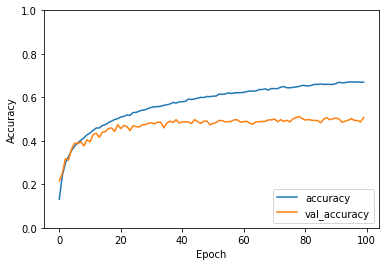

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

Największym problemem w treningu byo nadmierne dopasowanie co można wyczytać z wykresu. Aby mu zapobiec zastosowałem DropoutLayer aby losowe neurony były zerowane,  kernel_regularizer aby wagi nie miały dużych wartosci i nie dostosowywały się zbytnio do danych treningowych. Niestety nie udało się 

In [ ]:
# generting confusion matrix with labels
predictionY = np.argmax(model.predict(testX), axis=-1)
trueY=testY.ravel()
predictionY

import pandas as pd
np.set_printoptions(threshold=10000)
print(trueY.shape)
print(predictionY.shape)
data = {'y_Actual':    trueY,
        'y_Predicted': predictionY
        
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix.columns=CIFAR100_LABELS_LIST
confusion_matrix.insert(0, "names",CIFAR100_LABELS_LIST, True) 
confusion_matrix.set_index("names")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print (confusion_matrix)



(5000,)
(5000,)
                names  aquarium_fish  bear  bed  beetle  bottle  boy  bus  \
Actual                                                                      
0       aquarium_fish             65     1    0       0       0    0    1   
1                bear              0    22    0       0       1    0    0   
2                 bed              1     0   43       0       1    1    1   
3              beetle              1     1    0      43       1    0    0   
4              bottle              0     0    0       0      60    0    0   
5                 boy              1     2    3       0       1   27    2   
6                 bus              0     0    2       0       0    0   41   
7               camel              0     0    1       0       1    0    0   
8              castle              0     0    1       0       0    0    0   
9              cattle              0     2    1       0       1    0    0   
10         chimpanzee              0     7    0       0     

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(trueY,predictionY,target_names=CIFAR100_LABELS_LIST))
    


               precision    recall  f1-score   support

aquarium_fish       0.63      0.65      0.64       100
         bear       0.33      0.22      0.26       100
          bed       0.45      0.43      0.44       100
       beetle       0.80      0.43      0.56       100
       bottle       0.69      0.60      0.64       100
          boy       0.59      0.27      0.37       100
          bus       0.59      0.41      0.48       100
        camel       0.57      0.38      0.46       100
       castle       0.60      0.70      0.65       100
       cattle       0.42      0.22      0.29       100
   chimpanzee       0.54      0.70      0.61       100
        cloud       0.53      0.85      0.66       100
        couch       0.42      0.43      0.42       100
    crocodile       0.25      0.60      0.36       100
     dinosaur       0.67      0.38      0.48       100
     elephant       0.32      0.56      0.41       100
       forest       0.39      0.56      0.46       100
         

In [ ]:

model.save('model.h5')
from google.colab import files
files.download("model.h5") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>